In [2]:
!kaggle datasets download -d felicepollano/watermarked-not-watermarked-images
!unzip watermarked-not-watermarked-images

Streaming output truncated to the last 5000 lines.
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3535082.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3535630.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3536072.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3536235.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3536271.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3536293.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3536426.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3536516.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3539894.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3539898.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3544555.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3546189.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-354941.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3551217.jpeg 

In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Define dataset paths
dataset_dir = '/content/wm-nowm'

# Function to preprocess and apply edge detection (Canny edge detector)
def preprocess_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for category in os.listdir(input_dir):
        category_path = os.path.join(input_dir, category)
        output_category_path = os.path.join(output_dir, category)

        if not os.path.exists(output_category_path):
            os.makedirs(output_category_path)

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            output_img_path = os.path.join(output_category_path, img_name)

            try:
                img = cv2.imread(img_path)
                if img is None:  # Skip if image cannot be loaded
                    continue

                # Convert to grayscale
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                # Apply Canny edge detection
                edges = cv2.Canny(gray, 100, 200)
                # Save the edge-detected image
                cv2.imwrite(output_img_path, edges)
            except Exception as e:
                print(f"Error processing {img_name}: {e}")
                continue

# Preprocess and apply edge detection
train_dir = os.path.join(dataset_dir, 'train')
valid_dir = os.path.join(dataset_dir, 'valid')

preprocessed_train_dir = '/content/wm-nowm/train'
preprocessed_valid_dir = '/content/wm-nowm/valid'

preprocess_images(train_dir, preprocessed_train_dir)
preprocess_images(valid_dir, preprocessed_valid_dir)

Found 24987 files belonging to 2 classes.
Found 6588 files belonging to 2 classes.
Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 66s 265ms/step - accuracy: 0.6543 - loss: 0.5951 - val_accuracy: 0.8201 - val_loss: 0.4075
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 49s 251ms/step - accuracy: 0.8299 - loss: 0.3901 - val_accuracy: 0.8336 - val_loss: 0.3770
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 80s 241ms/step - accuracy: 0.8502 - loss: 0.3513 - val_accuracy: 0.8484 - val_loss: 0.3524
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 46s 234ms/step - accuracy: 0.8662 - loss: 0.3253 - val_accuracy: 0.8493 - val_loss: 0.3544
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 85s 251ms/step - accuracy: 0.8813 - loss: 0.2944 - val_accuracy: 0.8496 - val_loss: 0.3617
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 80s 243ms/step - accuracy: 0.8941 - loss: 0.2625 - val_accuracy: 0.8393 - val_loss: 0.4052
52/52 - 7s - 141ms/step - accuracy: 0.8484 - loss: 0.3524
Validation Accuracy: 0.85


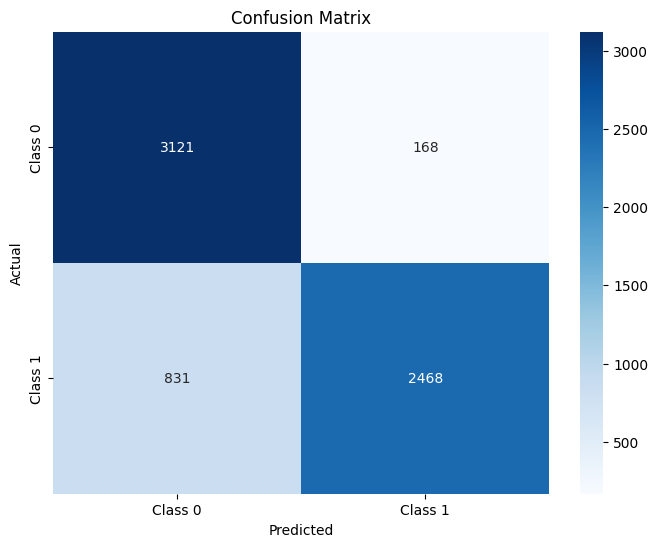

              precision    recall  f1-score   support

     Class 0       0.79      0.95      0.86      3289
     Class 1       0.94      0.75      0.83      3299

    accuracy                           0.85      6588
   macro avg       0.86      0.85      0.85      6588
weighted avg       0.86      0.85      0.85      6588



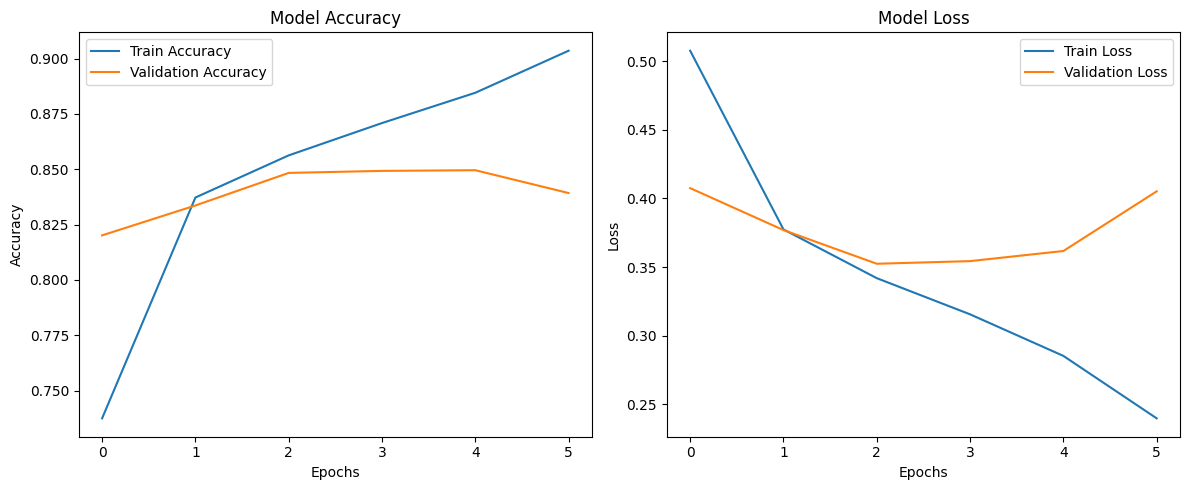

In [10]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import matplotlib.pyplot as plt
from google.colab import drive

# Enable mixed precision training globally
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)


# Define dataset paths
train_dir = '/content/wm-nowm/train'
valid_dir = '/content/wm-nowm/valid'

# Define the CNN model architecture
def create_cnn_model(input_shape):
    model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),  # Reduced kernel size
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(80, activation='relu'),
    Dense(40, activation='relu'),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Preprocessing function
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Rescale to range [0, 1]
    return image, label

# Optimized dataset pipeline using tf.data
batch_size = 128  # Increased batch size for better GPU parallelization
img_size = (256, 256)

def load_and_preprocess_dataset(dataset_dir):
    # Load images from directory with preprocessing
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        dataset_dir,
        image_size=img_size,
        batch_size=batch_size,
        color_mode='grayscale'
    )
    # Map preprocessing function
    dataset = dataset.map(lambda x, y: preprocess_image(x, y), num_parallel_calls=tf.data.AUTOTUNE)
    # Prefetching ensures data is ready before feeding it to the GPU pipeline
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset


# Load and preprocess training and validation datasets
train_dataset = load_and_preprocess_dataset(train_dir)
valid_dataset = load_and_preprocess_dataset(valid_dir)

# Create the CNN model
model = create_cnn_model(input_shape=(256, 256, 1))  # Grayscale image shape

# Set up EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# After training the model
history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=10,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(valid_dataset, verbose=2)
print(f"Validation Accuracy: {test_accuracy:.2f}")

# Get predictions and ground truth labels
y_true = []
y_pred = []

for images, labels in valid_dataset:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.round(preds).flatten())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
